In [1]:
## PANDAS 맛보기
import pandas as pd

In [2]:
list_tstr = ['a','b','c']
print (type(list_tstr))

<class 'list'>


In [8]:
## 시리즈는 판다스에 가장 낮은(초기, 기초) 단계
## 리스트를 시리즈에 넣었다 인덱스를 바꿔서 정의
series_var= pd.Series(list_tstr, index=[3,4,5])

In [17]:
## 인덱스로 가져오기
series_var[3]

'a'

In [10]:
dic = {'a':3, 'b':4, 'c':5}
s_dic = pd.Series(dic)
s_dic

a    3
b    4
c    5
dtype: int64

In [11]:
s_dic['a']

3

In [18]:
## 임의의 널값을 넣을 때는 None
dic_p={'name' : ['ho','jung','lee'],
      'age' : [19, 22, None],
       'grade' : ['A', 'B', None] 
      }
df=pd.DataFrame(dic_p)

In [19]:
type(df)
df

,name,age,grade
0,ho,19.0,A
1,jung,22.0,B
2,lee,NaN,None


In [20]:
df['age'].mean()

20.5

In [21]:
df['age']

0    19.0
1    22.0
2     NaN
Name: age, dtype: float64

In [22]:
df

,name,age,grade
0,ho,19.0,A
1,jung,22.0,B
2,lee,NaN,None


In [23]:
df.shape


(3, 3)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3 non-null      object 
 1   age     2 non-null      float64
 2   grade   2 non-null      object 
dtypes: float64(1), object(2)
memory usage: 200.0+ bytes


In [25]:
## 데이터의 널 여부 체크 // 결측치 확인
df.isnull().sum()

name     0
age      1
grade    1
dtype: int64

In [26]:
df.columns

Index(['name', 'age', 'grade'], dtype='object')

In [27]:
for col in df.columns :
    print(col)

name
age
grade


In [28]:
list(df.index)

[0, 1, 2]

In [29]:
df

,name,age,grade
0,ho,19.0,A
1,jung,22.0,B
2,lee,NaN,None


In [30]:
##- loc _ index based.
##- iloc_ rownum based
dic_p={'name' : ['ho','jung','lee'],
      'age' : [19, 22, 12],
       'grade' : ['A', 'B', 'D'] 
      }
df=pd.DataFrame(dic_p, index=['a','b', 'c'])

In [31]:
## index based _ loc c 열의 grade를 가져옴
df.loc['c']['grade']

'D'

In [32]:
## iloc 는 row를 가져온다 df.iloc[val] // 여기서 val은 row num (not index)
df.iloc[1:]

,name,age,grade
b,jung,22,B
c,lee,12,D


In [33]:
## 새로운 df 생성
df2= df[['name', 'grade']]

In [34]:
df2

,name,grade
a,ho,A
b,jung,B
c,lee,D


In [35]:
## age less than 30 df로 원하는 값만큼 필터링 df['age'] < 15 
## 해당 필터된 영역을 df [] 로 다시 감싼다 df[df['age']<15]
## 조건식이 n개인 경우
df[(df['age']<30) & (df['grade'].str.upper()=='B')]

,name,age,grade
b,jung,22,B


In [36]:
## string으로 바꾸고 대문자로 
df['grade'].str.upper()

a    A
b    B
c    D
Name: grade, dtype: object

In [37]:
df['name']=df ['name'].str.upper()

In [38]:
df

,name,age,grade
a,HO,19,A
b,JUNG,22,B
c,LEE,12,D


In [58]:
df = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')

In [56]:
#하나의 리스트에 다 담겨있다.
df=df[0]

In [57]:
df

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534
...,...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646


In [42]:
df.rename({'FundFund' : 'Fund'}, axis=1 , inplace=True) 
df.rename({'CityCity' : 'City'}, axis=1 , inplace=True) 
df.rename({'CertCert' : 'Cert'}, axis=1 , inplace=True) 
df.rename({'Bank NameBank' : 'Bank'}, axis=1 , inplace=True) 


In [43]:
df.rename({'CertCert' : 'Cert'}, axis=1 , inplace=True) 
df

,Bank,City,StateSt,Cert,Acquiring InstitutionAI,Closing DateClosing,Fund
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534
...,...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646


In [112]:
import pandas as pd
df = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')
df=df[0]
df_llist = []
df_list=list(df)
print(df_list
    )

['Bank NameBank', 'CityCity', 'StateSt', 'CertCert', 'Acquiring InstitutionAI', 'Closing DateClosing', 'FundFund']


In [104]:
colList=['Bank Name', 'City', 'StateSt', 'Cert',
       'Acquiring InstitutionAI', 'Closing Date', 'Fund']


In [113]:

df.columns=['Bank Name', 'City', 'StateSt', 'Cert','Acquiring InstitutionAI', 'Closing Date', 'Fund']

In [115]:
## 펀드의 값이 편드의 평균보다 큰 경우만 df로 출력
df[df['Fund'] >df['Fund'].mean()]


,Bank Name,City,StateSt,Cert,Acquiring InstitutionAI,Closing Date,Fund
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534
...,...,...,...,...,...,...,...
497,Silver Falls Bank,Silverton,OR,35399,Citizens Bank,"February 20, 2009",10041
498,Pinnacle Bank of Oregon,Beaverton,OR,57342,Washington Trust Bank of Spokane,"February 13, 2009",10040
499,Corn Belt Bank & Trust Co.,Pittsfield,IL,16500,The Carlinville National Bank,"February 13, 2009",10037
500,Riverside Bank of the Gulf Coast,Cape Coral,FL,34563,TIB Bank,"February 13, 2009",10038


In [87]:
df2= df[df['Fund'] == df['Fund'].min()]

In [88]:
df2

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
562,Bank of Honolulu,Honolulu,HI,21029,Bank of the Orient,"October 13, 2000",4645


In [116]:
## 소스와 타겟 모두에 upper()를 준다. 이때 소스가 문자열이 아닌경우 문자로 변경 df[key].str
df[df['City'].str.upper() == 'honolulu'.upper()]

,Bank Name,City,StateSt,Cert,Acquiring InstitutionAI,Closing Date,Fund
562,Bank of Honolulu,Honolulu,HI,21029,Bank of the Orient,"October 13, 2000",4645


In [45]:
## st & fund 조건으로 value count
df[(df['StateSt']=='GA') & (df['Fund']>=5000)& (df['Fund']<=10200)]['City'].value_counts()

Atlanta          6
Alpharetta       4
Newnan           2
Duluth           2
Ellijay          1
Jackson          1
McDonough        1
Commerce         1
Stockbridge      1
Kennesaw         1
Fayetteville     1
Villa Rica       1
Winder           1
Suwanee          1
Macon            1
Woodstock        1
Perry            1
Gray             1
Lawrenceville    1
Sparta           1
Norcross         1
Reidsville       1
Carrollton       1
Cornelia         1
Loganville       1
Name: City, dtype: int64

In [124]:
## state 를 기준으로 Fund데이터 살펴보기
## groupby , 특정 value 기준으로 묶어서 보여준다. (for 대신)
for i in df['StateSt'].unique():
    print(i, df[df['StateSt'] == i]['Fund'].sum())


KS 113059
FL 764744
WV 20550
NE 41232
NJ 78344
OH 81074
KY 31127
TX 127397
IL 694783
WI 108426
LA 35794
UT 76253
AR 35498
GA 948949
PA 97682
TN 67436
WA 194884
CO 102931
PR 41203
MN 235976
CA 411858
MD 103027
OK 72472
SC 103460
VA 51712
ID 20549
CT 15145
AZ 158881
NV 122013
NC 72246
MO 164012
AL 71730
MI 137544
IN 30929
IA 20530
MS 20601
NM 30760
OR 60888
NY 45398
MA 10211
SD 10081
WY 10080
NH 4647
HI 4645


In [122]:

StateFund=df.groupby(['StateSt']).sum().sort_values(by='StateSt')


In [123]:
StateFund

,Cert,Fund
StateSt,,
AL,161740,71730
AR,126292,35498
AZ,723217,158881
CA,1426618,411858
CO,350574,102931
CT,76224,15145
FL,2727753,764744
GA,3550756,948949
HI,21029,4645


In [53]:
## rows and columns
df.shape

(563, 7)

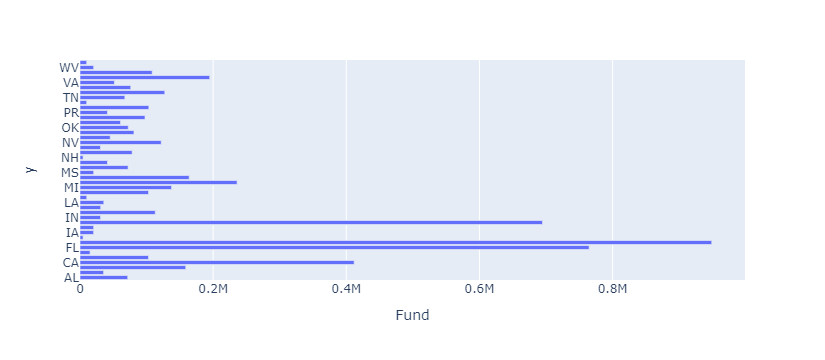

In [64]:
## 시각화 
import plotly.express as px
px.bar(data_frame = stateFund, x='Fund', y=StateFund.index)

In [125]:
## 데이트타임으로 형변환
df['Closing Date']= pd.to_datetime(df['Closing Date'])

In [126]:
df['Closing Date'].iloc[0].year ## year, month , day, hour, min

2020

In [129]:
import plotly.express as px
px.scatter(data_frame=df, x='Closing Date', y='Fund', color='StateSt')

In [130]:
##df['Year-Month'] = df ['Closing Date'].dt.year.astype() + df ['Closing Date'].dt.month.astype() 
df['Year'] = df ['Closing Date'].dt.year.astype(str)
df['Month'] = df ['Closing Date'].dt.month.astype(str)
df['Month'] = df['Month'].str.zfill(2)
df['Year-Month']= df['Year'].sort_values()+ df['Month'].sort_values()



In [131]:
px.scatter(data_frame=df , x= 'Year-Month', y= 'Fund', color='StateSt')

In [93]:
df['Year-Month'].value_counts()

200907    24
201004    23
201007    22
200910    20
201003    19
          ..
201609     1
201703     1
201704     1
201710     1
200010     1
Name: Year-Month, Length: 120, dtype: int64

In [132]:
## group by 시 year - month 에 묶은 다른 컬럼들이 들어감
DateFund = df.groupby('Year-Month').sum()
px.scatter(data_frame=DateFund, x= DateFund.index , y= 'Cert')

In [98]:
DateFund

,Cert,Fund
Year-Month,,
200010,21029,4645
200012,3815,4646
200102,34264,4647
200105,6629,4648
200107,32646,6004
...,...,...
201910,116429,21065
201911,21111,10534
202002,18265,10535
